In [1]:
import tensorflow as tf

from tensorflow.compat.v1.keras.backend import set_session

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
set_session(sess)

In [2]:
import numpy as np
import functools
import random
import datetime
import scipy
import h5py
import os
import pathlib
import nrrd
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib
import sys
import json
import skimage
from skimage import io, draw
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras import backend as K
from tensorflow import losses, optimizers
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from scipy.ndimage import zoom
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [3]:
import cv2
from scipy.ndimage import zoom
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image, header = nrrd.read(image_path)
            image_c = np.delete(image,np.s_[120::1], axis=2)
            image_c = np.delete(image_c,np.s_[:50:1], axis=2)
            image_z = zoom(image_c, (0.705, 0.587, 0.66)) #0.20 for 14
            #image_z = zoom(image_c, (0.35, 0.34, 0.5))
            image_z [image_z<0] = 0
            image_z = image_z / np.max(image_z)
            image_z = image_z.astype(np.float32)
            
            img =np.rot90(np.transpose(image_z, (2, 1, 0)), 2, (1,2))
            img = np.transpose(img, (2, 1, 0))
            
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_test, class_test =create_dataset(r'C:\\Dhruba Research Drive\\MNI_skullstiped_classification\\few_samples')

target_dict_test={k: v for v, k in enumerate(np.unique(class_test))}
target_val_test=  [target_dict_test[class_test[i]] for i in range(len(class_test))]
print(target_dict_test)

## For Test Set ###
#imgs.shape
x2=np.array(img_test, np.float32)
#print(x1.shape)
y2=np.array(list(map(int,target_val_test)), np.float32)
#print(y1.shape)

X_test = np.expand_dims(x2, axis=4)
y_test = y2

###X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask, test_size=0.10, random_state=None)

print(X_test.shape)
print(y_test.shape)

{'LVO': 0, 'No_LVO': 1}
(10, 128, 128, 46, 1)
(10,)


(10, 128, 128, 46, 1)


(46, 128, 128)

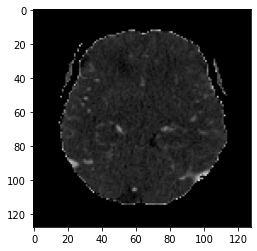

In [19]:
gamma = [.7]

img_aug_array= []

volume = np.power(X_test, gamma[0]) 
volume[volume < 0] = 0
        
X_train_aug = np.array(volume, np.float32)
print(X_train_aug.shape)

img = X_train_aug[1]
vol = np.transpose(img, (2, 1, 0, 3))
vol = vol[:, :, :, 0]
plt.imshow(vol[9], cmap = 'gray')
vol.shape

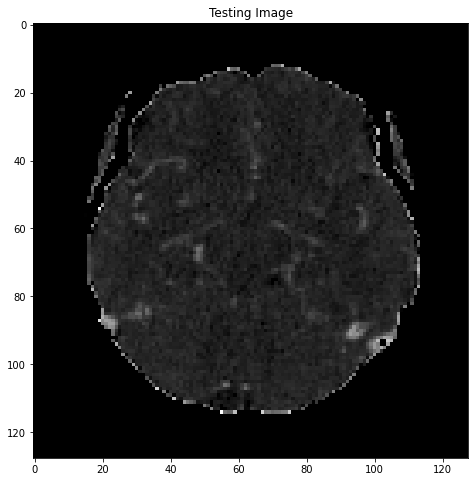

In [20]:
test_img_number = 1 
test_img = X_train_aug[test_img_number] #X_test
ground_truth=y_test[test_img_number]

test_img_input = np.expand_dims(test_img, 0)

slice = 6
plt.figure(figsize=(12,8))
plt.title('Testing Image')
x_t=np.transpose(test_img, (2, 1, 0, 3))
#x_t = x_t[:, :, :, 0]
plt.imshow(x_t[slice], cmap='gray')

In [46]:
import cv2
from scipy.ndimage import zoom
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image, header = nrrd.read(image_path)
            image_c = np.delete(image,np.s_[120::1], axis=2)
            image_c = np.delete(image_c,np.s_[:50:1], axis=2)
            image_z = zoom(image_c, (0.705, 0.587, 0.66)) #0.20 for 14
            #image_z = zoom(image_c, (0.35, 0.34, 0.5))
            image_z [image_z<0] = 0
            image_z = image_z / np.max(image_z)
            image_z = image_z.astype(np.float32)
            
            img =np.rot90(np.transpose(image_z, (2, 1, 0)), 2, (1,2))
            img = np.transpose(img, (2, 1, 0))
            
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_train, class_train =create_dataset(r'C:\\Dhruba Research Drive\\MNI_skullstiped_classification\\train')
img_test, class_test =create_dataset(r'C:\\Dhruba Research Drive\\MNI_skullstiped_classification\\test')

target_dict={k: v for v, k in enumerate(np.unique(class_train))}
target_val=  [target_dict[class_train[i]] for i in range(len(class_train))]
print(target_dict)
target_dict_test={k: v for v, k in enumerate(np.unique(class_test))}
target_val_test=  [target_dict_test[class_test[i]] for i in range(len(class_test))]
print(target_dict_test)

## For Training Set ###
#imgs.shape
x1=np.array(img_train, np.float32)
#print(x1.shape)
y1=np.array(list(map(int,target_val)), np.float32)
#print(y1.shape)
X_train = np.expand_dims(x1, axis=4)
y_train = y1

## For Test Set ###
#imgs.shape
x2=np.array(img_test, np.float32)
#print(x1.shape)
y2=np.array(list(map(int,target_val_test)), np.float32)
#print(y1.shape)

X_test = np.expand_dims(x2, axis=4)
y_test = y2

###X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask, test_size=0.10, random_state=None)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

{'LVO': 0, 'No_LVO': 1}
{'LVO': 0, 'No_LVO': 1}
(1280, 128, 128, 46, 1)
(1280,)
(260, 128, 128, 46, 1)
(260,)


In [6]:
# model_2 = load_model('densenet2.epoch40-sen0.89spe0.48.hdf5', compile = False)
# model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 128, 128, 23 0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 128, 128, 46 0                                            
__________________________________________________________________________________________________
batch_normalization_474 (BatchN (None, 128, 128, 23, 4           input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_475 (BatchN (None, 128, 128, 46, 4           input_10[0][0]                   
____________________________________________________________________________________________

In [47]:
img_aug_array=[]
class_aug_array=[]
for d in range (y_train.shape[0]):

    for e in range (4):
        img = np.rot90(np.transpose(img_train[d], (2, 1, 0)), e, (1,2))
        img = np.transpose(img, (2, 1, 0))
        img_aug_array.append(img)
        
        y_train_class = y_train[d]
        class_aug_array.append(y_train_class)

X_train_aug1 = np.array(img_aug_array, np.float32)
X_train_aug1 = np.expand_dims(X_train_aug1, axis=4)
print(X_train_aug1.shape)

#y_train_aug = class_aug_array

target_dict={k: v for v, k in enumerate(np.unique(class_aug_array))}
target_val=  [target_dict[class_aug_array[i]] for i in range(len(class_aug_array))]
print(target_dict)
y_train_aug1=np.array(list(map(int,target_val)), np.float32)
print(y_train_aug1.shape)

(5120, 128, 128, 46, 1)
{0.0: 0, 1.0: 1}
(5120,)


In [48]:
#Dense net modular blocks

#this method performs batch normalization, relu activation and then the actual 3d Convolution, taking input, filters, kernel and stride as variables
#given the stride of 1 here this will not alter the overall dimensions of our images
filters = 32

def batch_relu_conv3D (x, filters, kernel = 1, strides = 1):
    a = BatchNormalization()(x)
    b = ReLU()(a)
    c = Conv3D(filters, kernel, strides=strides, padding = 'same')(b)
    return c

#this is our dense block basically what happens in the dense net is that it applies a 1x1 convolution then a 3x3 convolution and it does this however many times you want
#in the first dense block this happens 6 times, 2nd one is 12, 3rd is 24 and 4th is 16 times
#at the end it then concatenates the input with the final output so if the input was 50, 50, 50, 24 (with the 4rd being feature maps)
#you can modify the number of filters here as you please but 32 is what is used in the dense net

def dense_block(x, repetition):
  for i in range(repetition):
    y = batch_relu_conv3D(x, 4*filters)
    y = batch_relu_conv3D(y, filters, 3)
    x = tf.keras.layers.concatenate([y,x])
  return x

#now for the transition layer which involves a 1x1 convolutional layer and then a 2x2 average pooling layer with a stride of 2 (decreasing the dimensions again)
#in addition here we actually decrease the number of filters by half (I guess this makes it more efficient)
#the part using int_shape is just returning the shape of the tensor and we are taking the last value of that using -1 which represents number of filters and dividing by 2

def transition_layer(x):
  x = batch_relu_conv3D(x, (tf.keras.backend.int_shape(x)[-1]) //2)
  x = AvgPool3D(2, strides = 2, padding = 'same')(x)
  return(x)

#remember we must list the channels for this to work and it is always channel last, the benefit of a dense net is that it is really good for bottleneck and vanishing gradient
#I would first run this as is with the two arms, trying various inputs (raw subtraciton versus MIPS, change size too, ... etc)
#Then I would change the learning rate and other parameters

#POTENTIAL MODIFICATIONS FOR EXPERIMENTS
#when pooling in the later transition layers to avoid losing input after say the second dense block in the z dimension may want to specify the pooling factor stride in the z dimension as 1
#residual connections between the the two arms of our double dense net = may learn which is more important ... could be useful

X1 = tf.keras.layers.Input((128,128,14, 1))

#first convolution of dense net 121 which uses a stride of 2 and a kernel size of 7 with same padding with 64 filte

#arm1
L1_X1 = batch_relu_conv3D(X1, filters = 64, kernel = 7, strides = 2)
L1_X1_pooled =MaxPool3D(3, strides = 2, padding = 'same')(L1_X1)

#each generic convolution block after this first one has teh following sequence Batch Normalization, ReLu activation, and then the actual 3D convolution, see the methods defined above
#what we do is now run a series of dense blocks (with variable repetitions within them) followed by a transition block to downsample the entire thing

#FIRST DENSE BLOCK
Dense1_X1 = dense_block(L1_X1_pooled, 6)
Tran1_X1 = transition_layer(Dense1_X1)


#SECOND DENSE BLOCK
#arm 1
Dense2_X1 = dense_block(Tran1_X1, 12)
Tran2_X1 = transition_layer(Dense2_X1)

#THIRD DENSE BLOCK
#arm 1
Dense3_X1 = dense_block(Tran2_X1, 24)
Tran3_X1 = transition_layer(Dense3_X1)

#FOURTH DENSE BLOCK (lacks a transition layer)
#arm 1
Dense4_X1 = dense_block(Tran3_X1, 16)


#This is the final average pool which brings it all down to a 1 by 1, essentially a single output for each feature map
Final_Pool_X1 = GlobalAveragePooling3D()(Dense4_X1)

#Final densely connected layer, in our case there is only 1 node because it is binary classification
#if this becomes a multiclass problem at some point then you would change the code here to reflect the number of classes
#also teh activation is sigmoid here which works fine for binary classification, if this is to be later applied to multi class problems then we have to use a softmax
#in the case of multiclass we would be changing multiple things about our model = including the type of loss

logits = Dense(1, activation='sigmoid')(Final_Pool_X1)

model = Model(inputs = X1, outputs = logits, name = 'test')

model.summary()

Model: "test"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 14 0                                            
__________________________________________________________________________________________________
batch_normalization_78 (BatchNo (None, 128, 128, 14, 4           input_3[0][0]                    
__________________________________________________________________________________________________
re_lu_78 (ReLU)                 (None, 128, 128, 14, 0           batch_normalization_78[0][0]     
__________________________________________________________________________________________________
conv3d_78 (Conv3D)              (None, 64, 64, 7, 64 22016       re_lu_78[0][0]                   
_______________________________________________________________________________________________

In [7]:
#custom sensitivity, specificity, and PPV metrics utilizing K as backend

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics = [sensitivity, specificity, 'accuracy'])

# #this is for tensorboard logs
# log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

filepath = 'densenet_5mm.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_accuracy',
                             verbose=1, 
                             save_best_only=False,
                             mode='max')
#callbacks = [checkpoint, history_logger]
callbacks = [checkpoint]

#for Adam optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9)

optim = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#optim = tf.keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=optim,
              loss='binary_crossentropy',
              metrics=[sensitivity, specificity, 'accuracy'])

results=model.fit(X_train_aug, y_train_aug,
          validation_data = (X_test, y_test),
          epochs = 30,
          batch_size = 70,
          #use_multiprocessing=False,
          #workers=1,
          callbacks=callbacks)

Train on 6100 samples, validate on 320 samples
Epoch 1/30
6100/6100 [==============================] - ETA: 0s - loss: 0.6041 - sensitivity: 0.6963 - specificity: 0.7877 - accuracy: 0.7407
Epoch 00001: saving model to densenet_5mm.epoch01-loss1.93.hdf5
6100/6100 [==============================] - 89s 15ms/sample - loss: 0.6041 - sensitivity: 0.6963 - specificity: 0.7877 - accuracy: 0.7407 - val_loss: 1.9350 - val_sensitivity: 0.0000e+00 - val_specificity: 1.0000 - val_accuracy: 0.5000
Epoch 2/30
6100/6100 [==============================] - ETA: 0s - loss: 0.3637 - sensitivity: 0.8197 - specificity: 0.8559 - accuracy: 0.8352
Epoch 00002: saving model to densenet_5mm.epoch02-loss1.06.hdf5
6100/6100 [==============================] - 71s 12ms/sample - loss: 0.3637 - sensitivity: 0.8197 - specificity: 0.8559 - accuracy: 0.8352 - val_loss: 1.0572 - val_sensitivity: 0.9002 - val_specificity: 0.2269 - val_accuracy: 0.5625
Epoch 3/30
6100/6100 [==============================] - ETA: 0s - loss:

Epoch 20/30
6100/6100 [==============================] - ETA: 0s - loss: 0.0199 - sensitivity: 0.9962 - specificity: 0.9939 - accuracy: 0.9943
Epoch 00020: saving model to densenet_5mm.epoch20-loss2.03.hdf5
6100/6100 [==============================] - 72s 12ms/sample - loss: 0.0199 - sensitivity: 0.9962 - specificity: 0.9939 - accuracy: 0.9943 - val_loss: 2.0276 - val_sensitivity: 0.6094 - val_specificity: 0.6337 - val_accuracy: 0.6219
Epoch 21/30
6100/6100 [==============================] - ETA: 0s - loss: 0.0031 - sensitivity: 1.0000 - specificity: 0.9997 - accuracy: 0.9998
Epoch 00021: saving model to densenet_5mm.epoch21-loss2.42.hdf5
6100/6100 [==============================] - 77s 13ms/sample - loss: 0.0031 - sensitivity: 1.0000 - specificity: 0.9997 - accuracy: 0.9998 - val_loss: 2.4170 - val_sensitivity: 0.6833 - val_specificity: 0.4469 - val_accuracy: 0.5719
Epoch 22/30
6100/6100 [==============================] - ETA: 0s - loss: 0.0189 - sensitivity: 0.9909 - specificity: 0.9

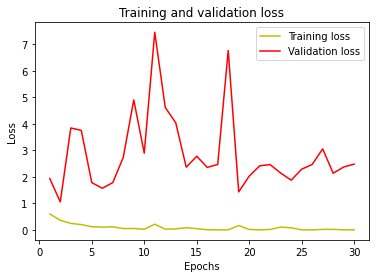

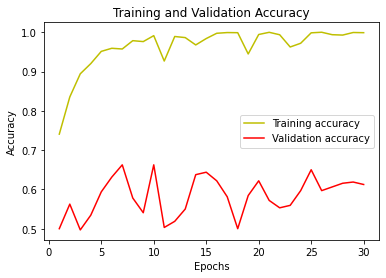

In [8]:
loss=results.history['loss']
val_loss=results.history['val_loss']
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

plt.plot(epochs, acc, 'y', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
best_model = load_model('classification_densenet.epoch33-loss2.20.hdf5', compile = False)

1.0
[[0.99999857]]


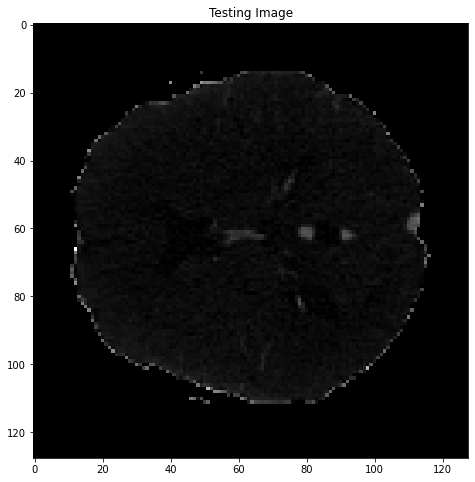

In [46]:
test_img_number = 4045 #out of 0-319
test_img = X_train_aug[test_img_number]
ground_truth=y_train_aug[test_img_number]

test_img_input = np.expand_dims(test_img, 0)

test_pred = best_model.predict(test_img_input)


slice = 9
plt.figure(figsize=(12,8))
plt.title('Testing Image')
x_t=np.transpose(test_img, (2, 1, 0, 3))
#x_t = x_t[:, :, :, 0]
plt.imshow(x_t[slice], cmap='gray')

print(ground_truth)
print(test_pred)

In [49]:
filters = 32

def batch_relu_conv3D (x, filters, kernel = 1, strides = 1):
    a = BatchNormalization()(x)
    b = ReLU()(a)
    c = Conv3D(filters, kernel, strides=strides, padding = 'same')(b)
    return c

#this is our dense block basically what happens in the dense net is that it applies a 1x1 convolution then a 3x3 convolution and it does this however many times you want
#in the first dense block this happens 6 times, 2nd one is 12, 3rd is 24 and 4th is 16 times
#at the end it then concatenates the input with the final output so if the input was 50, 50, 50, 24 (with the 4rd being feature maps)
#you can modify the number of filters here as you please but 32 is what is used in the dense net

def dense_block(x, repetition):
  for i in range(repetition):
    y = batch_relu_conv3D(x, 4*filters)
    y = batch_relu_conv3D(y, filters, 3)
    x = tf.keras.layers.concatenate([y,x])
  return x

#now for the transition layer which involves a 1x1 convolutional layer and then a 2x2 average pooling layer with a stride of 2 (decreasing the dimensions again)
#in addition here we actually decrease the number of filters by half (I guess this makes it more efficient)
#the part using int_shape is just returning the shape of the tensor and we are taking the last value of that using -1 which represents number of filters and dividing by 2

def transition_layer(x):
  x = batch_relu_conv3D(x, (tf.keras.backend.int_shape(x)[-1]) //2)
  x = AvgPool3D(2, strides = 2, padding = 'same')(x)
  return(x)

X1 = Input((128,128,23,1))
X2 = Input((128,128,46,1))

#first convolution of dense net 121 with a kernel size of 7 with same padding with 64 filters
#importantly since i dont want to lose tons of z axis information we will attempt to keep the stride 1 in z dimension for both of the intial operations

L1_X1 = batch_relu_conv3D(X1, filters=64, kernel=7, strides = (2,2,1))
L1_X1_pooled = tf.keras.layers.MaxPool3D(3, strides = (2,2,1), padding = 'same')(L1_X1)

L1_X2 = batch_relu_conv3D(X2, filters=64, kernel=7, strides = (2,2,1))
L1_X2_pooled = tf.keras.layers.MaxPool3D(3, strides = (2,2,1), padding = 'same')(L1_X2)

#each generic convolution block after this first one has teh following sequence Batch Normalization, ReLu activation, and then the actual 3D convolution, see the methods defined above
#what we do is now run a series of dense blocks (with variable repetitions within them) followed by a transition block to downsample the entire thing

#first dense block
Dense1_X1 = dense_block(L1_X1_pooled, 6)
Tran1_X1 = transition_layer(Dense1_X1)

Dense1_X2 = dense_block(L1_X2_pooled, 6)
Tran1_X2 = transition_layer(Dense1_X2)

#second dense block
Dense2_X1 = dense_block(Tran1_X1, 6)
Tran2_X1 = transition_layer(Dense2_X1)

Dense2_X2 = dense_block(Tran1_X2, 6)
Tran2_X2 = transition_layer(Dense2_X2)


#third dense block
Dense3_X1 = dense_block(Tran2_X1, 6)

Dense3_X2 = dense_block(Tran2_X2, 6)



#This is the final average pool which brings it all down to a 1 by 1, essentially a single output for each feature map
Final_Pool_X1 = GlobalAveragePooling3D()(Dense3_X1)
Final_Pool_X2 = GlobalAveragePooling3D()(Dense3_X2)


#concatenation layer to concatenate the two inputs prior to dense layer to calculate outputs
final_concat = tf.keras.layers.concatenate([Final_Pool_X1, Final_Pool_X2])


#Final densely connected layer, in our case there is only 1 node because it is binary classification
#if this becomes a multiclass problem at some point then you would change the code here to reflect the number of classes
#also the activation is sigmoid here which works fine for binary classification, if this is to be later applied to multi class problems then we have to use a softmax
#in the case of multiclass we would be changing multiple things about our model = including the type of loss

logits = Dense(1, activation='sigmoid')(final_concat)

model = Model(inputs = [X1, X2], outputs = logits)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 23 0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 128, 128, 46 0                                            
__________________________________________________________________________________________________
batch_normalization_198 (BatchN (None, 128, 128, 23, 4           input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_199 (BatchN (None, 128, 128, 46, 4           input_5[0][0]                    
____________________________________________________________________________________________

In [50]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image, header = nrrd.read(image_path)
            image_c = np.delete(image,np.s_[120::1], axis=2)
            image_c = np.delete(image_c,np.s_[:50:1], axis=2)
            image_z = zoom(image_c, (0.705, 0.587, 0.33))
            image_z [image_z<0] = 0
            image_z = image_z / np.max(image_z)
            image_z = image_z.astype(np.float32)
            
            img =np.rot90(np.transpose(image_z, (2, 1, 0)), 2, (1,2))
            img = np.transpose(img, (2, 1, 0))
            
            img_data_array.append(img)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_train, class_train =create_dataset(r'C:\\Dhruba Research Drive\\MNI_skullstiped_classification\\train')
img_test, class_test =create_dataset(r'C:\\Dhruba Research Drive\\MNI_skullstiped_classification\\test')

target_dict={k: v for v, k in enumerate(np.unique(class_train))}
target_val=  [target_dict[class_train[i]] for i in range(len(class_train))]
print(target_dict)
target_dict_test={k: v for v, k in enumerate(np.unique(class_test))}
target_val_test=  [target_dict_test[class_test[i]] for i in range(len(class_test))]
print(target_dict_test)

## For Training Set ###
#imgs.shape
x1=np.array(img_train, np.float32)
#print(x1.shape)
y1=np.array(list(map(int,target_val)), np.float32)
#print(y1.shape)
X_train2 = np.expand_dims(x1, axis=4)
y_train2 = y1

## For Test Set ###
#imgs.shape
x2=np.array(img_test, np.float32)
#print(x1.shape)
y2=np.array(list(map(int,target_val_test)), np.float32)
#print(y1.shape)

X_test2 = np.expand_dims(x2, axis=4)
y_test2 = y2

###X_train, X_test, y_train, y_test = train_test_split(train_img, train_mask, test_size=0.10, random_state=None)

print(X_train2.shape)
print(y_train2.shape)

print(X_test2.shape)
print(y_test2.shape)

{'LVO': 0, 'No_LVO': 1}
{'LVO': 0, 'No_LVO': 1}
(1280, 128, 128, 23, 1)
(1280,)
(260, 128, 128, 23, 1)
(260,)


In [51]:
img_aug_array=[]
class_aug_array=[]
for d in range (y_train2.shape[0]):

    for e in range (4):
        img = np.rot90(np.transpose(img_train[d], (2, 1, 0)), e, (1,2))
        img = np.transpose(img, (2, 1, 0))
        img_aug_array.append(img)
        
        y_train_class = y_train2[d]
        class_aug_array.append(y_train_class)

X_train_aug2 = np.array(img_aug_array, np.float32)
X_train_aug2 = np.expand_dims(X_train_aug2, axis=4)
print(X_train_aug2.shape)

#y_train_aug = class_aug_array

target_dict={k: v for v, k in enumerate(np.unique(class_aug_array))}
target_val=  [target_dict[class_aug_array[i]] for i in range(len(class_aug_array))]
print(target_dict)
y_train_aug2=np.array(list(map(int,target_val)), np.float32)
print(X_train_aug2.shape)
print(y_train_aug2.shape)

(5120, 128, 128, 23, 1)
{0.0: 0, 1.0: 1}
(5120, 128, 128, 23, 1)
(5120,)


In [52]:
#custom sensitivity, specificity, and PPV metrics utilizing K as backend

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

filepath = 'dnsnet1.5_3mm.eph{epoch:02d}-sen{val_sensitivity:.2f}-spe{val_specificity:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_sensitivity',
                             verbose=1, 
                             save_best_only=False,
                             mode='max')
#callbacks = [checkpoint, history_logger]
callbacks = [checkpoint]

#for Adam optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-5,
    decay_steps=2000,
    decay_rate=0.7)

optim = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#optim = tf.keras.optimizers.Adam(learning_rate=0.0001)


model.compile(optimizer=optim,
              loss='binary_crossentropy',
              metrics=[sensitivity, specificity, 'accuracy'])

results2=model.fit(
          x=[X_train_aug2, X_train_aug1],
          y=[y_train_aug1],
          validation_data = ([X_test2, X_test], y_test),
          epochs = 10,
          batch_size = 10,
          #use_multiprocessing=False,
          #workers=1,
          callbacks=callbacks)

Train on 5120 samples, validate on 260 samples
Epoch 1/10
5120/5120 [==============================] - ETA: 0s - loss: 0.6457 - sensitivity: 0.4039 - specificity: 0.8178 - accuracy: 0.6484
Epoch 00001: saving model to dnsnet1.5_3mm.eph01-sen1.00-spe0.00.hdf5
5120/5120 [==============================] - 884s 173ms/sample - loss: 0.6457 - sensitivity: 0.4039 - specificity: 0.8178 - accuracy: 0.6484 - val_loss: 2.8997 - val_sensitivity: 1.0000 - val_specificity: 0.0000e+00 - val_accuracy: 0.3846
Epoch 2/10
5120/5120 [==============================] - ETA: 0s - loss: 0.5795 - sensitivity: 0.5128 - specificity: 0.8651 - accuracy: 0.7184
Epoch 00002: saving model to dnsnet1.5_3mm.eph02-sen0.68-spe0.25.hdf5
5120/5120 [==============================] - 671s 131ms/sample - loss: 0.5795 - sensitivity: 0.5128 - specificity: 0.8651 - accuracy: 0.7184 - val_loss: 0.9321 - val_sensitivity: 0.6846 - val_specificity: 0.2511 - val_accuracy: 0.4385
Epoch 3/10
5120/5120 [==============================] -

In [53]:
classification_model = load_model('dnsnet1.5_3mm.eph06-sen0.50-spe0.93.hdf5', compile = False)

In [93]:
class_img_number = 195
test_img_1 = X_test2[class_img_number]
test_img_2 = X_test[class_img_number]
ground_truth = y_test[class_img_number]
test_img_input_1 = np.expand_dims(test_img_1, 0)
test_img_input_2 = np.expand_dims(test_img_2, 0)
test_pred = classification_model.predict([test_img_input_1, test_img_input_2])
print(ground_truth)
print(test_pred)

1.0
[[0.9568823]]
